<a href="https://colab.research.google.com/github/kweenkeen/ProofMode/blob/main/proof_data_output_largeset_MODULAR_OUTLIERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing all dependencies

!pip install PyPDF2
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from PyPDF2 import PdfFileMerger
from matplotlib import rcParams
from google.colab import files
import re

# Uploading ProofMode collection file, created by reate_csv_pandas_subdirectories_dictionary.py
proof_mode_file = files.upload()
filename = next(iter(proof_mode_file))
df = pd.read_csv(filename)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 198 kB 4.2 MB/s 


Saving ProofMode_Collection_2022-01-27_Fabby2.csv to ProofMode_Collection_2022-01-27_Fabby2.csv


In [ ]:
def renaming_function_CSV_file(df):
  new_column_names = []
  for (columnName, columnData) in df.iteritems():
    columnName_split = columnName.replace(".", " ")
    for ind, char in enumerate(columnName[:-1]):
      if columnName[ind].islower() and columnName[ind+1].isupper():
        columnName_split = columnName[:ind+1] + ' ' + columnName[ind+1:]
    new_column_names.append(columnName_split)

  df.columns=new_column_names


In [ ]:
renaming_function_CSV_file(df)

In [ ]:
df.head()

,File Hash SHA256,Locale,SafetyCheckCts Match,Location Provider,IPv6,IPv4,Location Accuracy,Location Latitude,Language,Network Type,...,SafetyCheckBasic Integrity,Location Time,File Modified,Cell Info,Safety Check,Location Altitude,SafetyCheck Timestamp,Proof Generated,File Path,Location Speed
0,447fbebbfd71e71b3440dca3fac1dadb78aa573aaf7438...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:05 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:28:38 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
1,796bf6fe5e16ccabb404994799758ea268272405d6563a...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:07 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:30:36 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
2,9f38ed71e5520746024f69c79572428be07a66d8f72b1b...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:11 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:32:25 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
3,b7eedca7abc17965b9302cddc2e1e1771c3d975d976985...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:14 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:33:47 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
4,1160deb07325ac0745eed79cc6fdfd639360ba8940951b...,USA,NaN,gps,FE80::E0A5:8CFF:FE2D:4596 2600:8803:B806:9600:...,192.168.0.155,10.7,35.599512,English,Wifi,...,NaN,1.643160e+12,Monday January 24 2022 10:38:59 PM Central S...,[],NaN,371.0,NaN,Wednesday January 26 2022 1:54:28 AM Central...,/storage/emulated/0/DCIM/Camera/20220124_22385...,0.0


In [ ]:
def binning_function(df):
  
  # Create list of titles
  hardware_software_metdata_list = ['Locale', 'Location Provider','IPv6', 'IPv4','Language', 'Network Type', 'Network', 'Manufacturer', 'Data Type', 'Hardware', 'Screen Size', 'Cell Info']

  #Initiate device ID dataframe
  DeviceID_List = []

  # Create new dataframe for pivot table, with Unique Device IDs as the column headers, and hardware/software features as the row index
  for i in list(df['Device ID']):
    print(i)
    if i not in DeviceID_List:
      DeviceID_List.append(i)

  device_df = pd.DataFrame(columns=DeviceID_List, index=hardware_software_metdata_list)

  # Group number of each unique feature by device ID.
  # (For example, if there are two language per device ID, count "2")
  # For most features, there will be 1 feature per device ID.

  for i, row in device_df.iterrows():
    print(i, row)
    aggregate_df = df.groupby("Device ID")[i].nunique()
    device_df = device_df.append(aggregate_df)
    
  # device_df = device_df.fillna(0)

  #This is a REALLY SLOPPY way of doing this, but it's what worked quickest so I'm leaving it for now.
  # If you're translating this into JavaScript, a better option would be to replace each line based on the index

  device_df = device_df.dropna()

  # In a future version of the code, I'm going to change the initiation of the DeviceID Dataframe to avoid having to transpose it later on.
  # Trial and error process of working with the histogram and the pivot table, sorry about that!
  transpose_df = device_df.T

  return device_df, transpose_df

In [ ]:
device_df, transpose_df = binning_function(df)

35ow5ifrnuvmzguko87wvkeg8
35ow5ifrnuvmzguko87wvkeg8
35ow5ifrnuvmzguko87wvkeg8
35ow5ifrnuvmzguko87wvkeg8
4r83r0sk1f1x8akc1mrszso0n
4r83r0sk1f1x8akc1mrszso0n
4r83r0sk1f1x8akc1mrszso0n
4r83r0sk1f1x8akc1mrszso0n
3hsk2wook5uvehesdc1xo85j0
3hsk2wook5uvehesdc1xo85j0
3hsk2wook5uvehesdc1xo85j0
3hsk2wook5uvehesdc1xo85j0
3hsk2wook5uvehesdc1xo85j0
4dq4eszdb98ukzd78rlx2rr7
4dq4eszdb98ukzd78rlx2rr7
4dq4eszdb98ukzd78rlx2rr7
4dq4eszdb98ukzd78rlx2rr7
4gf222mtlsf8d0xjxf26hh5sz
4gf222mtlsf8d0xjxf26hh5sz
4gf222mtlsf8d0xjxf26hh5sz
4gf222mtlsf8d0xjxf26hh5sz
3jf4vm9udkl9dbxg3r9g9ot55
3jf4vm9udkl9dbxg3r9g9ot55
3jf4vm9udkl9dbxg3r9g9ot55
3jf4vm9udkl9dbxg3r9g9ot55
Locale 35ow5ifrnuvmzguko87wvkeg8    NaN
4r83r0sk1f1x8akc1mrszso0n    NaN
3hsk2wook5uvehesdc1xo85j0    NaN
4dq4eszdb98ukzd78rlx2rr7     NaN
4gf222mtlsf8d0xjxf26hh5sz    NaN
3jf4vm9udkl9dbxg3r9g9ot55    NaN
Name: Locale, dtype: object
Location Provider 35ow5ifrnuvmzguko87wvkeg8    NaN
4r83r0sk1f1x8akc1mrszso0n    NaN
3hsk2wook5uvehesdc1xo85j0    NaN
4dq4

In [ ]:
device_df.head()

,35ow5ifrnuvmzguko87wvkeg8,4r83r0sk1f1x8akc1mrszso0n,3hsk2wook5uvehesdc1xo85j0,4dq4eszdb98ukzd78rlx2rr7,4gf222mtlsf8d0xjxf26hh5sz,3jf4vm9udkl9dbxg3r9g9ot55
Locale,1,1,1,1,1,1
Location Provider,0,1,1,1,0,0
IPv6,1,1,1,1,1,1
IPv4,1,1,1,1,1,1
Language,1,1,1,1,1,1


In [ ]:
def small_plots(transpose_df):

  # CREATING SUBPLOTS
  
  fig = plt.figure()
  fig.tight_layout()
  plt.style.use('seaborn')


  for label, content in transpose_df.iteritems():
    i = 0
    for number_attributes in content.values:
      if number_attributes != 1:
        fig.tight_layout()
        # axs = fig.add_subplot(2, 3, i+1)
        plt.hist(transpose_df[label], align='mid')
        plt.xlabel("Outliers")
        plt.ylabel("Number of Unique Devices")
        i += 1
        
    plt.savefig('foo.png', bbox_inches='tight')

  # files.download('foo.png')

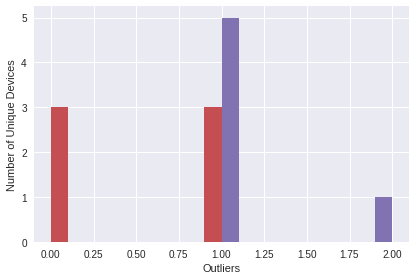

In [ ]:
small_plots(transpose_df)

In [ ]:
import numpy as np
transpose_df.head()

,Locale,Location Provider,IPv6,IPv4,Language,Network Type,Network,Manufacturer,Data Type,Hardware,Screen Size,Cell Info
35ow5ifrnuvmzguko87wvkeg8,1,0,1,1,1,1,1,1,1,1,1,1
4r83r0sk1f1x8akc1mrszso0n,1,1,1,1,1,1,1,1,1,1,1,1
3hsk2wook5uvehesdc1xo85j0,1,1,1,1,1,1,1,1,1,1,1,2
4dq4eszdb98ukzd78rlx2rr7,1,1,1,1,1,1,1,1,1,1,1,1
4gf222mtlsf8d0xjxf26hh5sz,1,0,1,1,1,1,1,1,1,1,1,1


In [ ]:
def outliers_histogram(transpose_df):
    outliers_df = pd.DataFrame()
    for label, content in transpose_df.iteritems():
      for number_attributes in content.values:
        if number_attributes != 1:
          outliers_df[label] = content
    outliers_df = outliers_df.replace(1, np.nan)
    outliers_df = outliers_df.dropna(how='all')
    outliers_list = list(outliers_df.columns.values)
    outliers_ID = list(outliers_df.index.values)
    return outliers_df, outliers_list, outliers_ID


In [ ]:
outliers_df, outliers_list, outliers_ID = outliers_histogram(transpose_df)

In [ ]:
print(outliers_ID)

['35ow5ifrnuvmzguko87wvkeg8', '3hsk2wook5uvehesdc1xo85j0', '4gf222mtlsf8d0xjxf26hh5sz', '3jf4vm9udkl9dbxg3r9g9ot55']


In [ ]:
outliers_df.head()

,Location Provider,Cell Info
35ow5ifrnuvmzguko87wvkeg8,0.0,NaN
3hsk2wook5uvehesdc1xo85j0,NaN,2.0
4gf222mtlsf8d0xjxf26hh5sz,0.0,NaN
3jf4vm9udkl9dbxg3r9g9ot55,0.0,NaN


In [ ]:
def layered_histogram(transpose_df):
  # Import altair
  outliers_df, outliers_list, outliers_ID = outliers_histogram(transpose_df)

  import altair as alt

  # Extract headers from column names
  source = outliers_df
  header_list = list(source.columns)

  chart = alt.Chart(source).transform_fold(
      outliers_list,
      as_=['Device Attribute', 'Unique Devices']
  ).mark_bar(
      opacity=.5,
      binSpacing=2,
      clip=True
  ).encode(
      x = alt.X('Unique Devices:Q', axis=alt.Axis(title='Number of Attributes per Device', tickMinStep=1)),
      y = alt.Y('count()', stack=None, axis=alt.Axis(title='Number of Unique Devices', tickMinStep=1)),
      color = alt.Color('Device Attribute:N', scale=alt.Scale(scheme='paired'))

  ).properties(
      title='Histogram of Attributes Across Devices'
  )


  chart.configure_title(
      fontSize=20,
      font='Tahoma',
      anchor='start',
      color='grey')
  
  return(chart)

In [ ]:
layered_histogram(transpose_df)

alt.Chart(...)

In [ ]:
def find_filepath_outliers(df, outliers_ID):
  list_of_file_hashes = []
  for j in outliers_ID:
    for i, row in df.iterrows():
      if df['Device ID'][i] == j:
        list_of_file_hashes.append(df['File Hash SHA256'][i])
  return list_of_file_hashes

In [ ]:
find_filepath_outliers(df, outliers_ID)

['447fbebbfd71e71b3440dca3fac1dadb78aa573aaf743805afc76aa4803f3173',
 '796bf6fe5e16ccabb404994799758ea268272405d6563a55827e48a508e58ee3',
 '9f38ed71e5520746024f69c79572428be07a66d8f72b1b1218858d3e8ae5e6a3',
 'b7eedca7abc17965b9302cddc2e1e1771c3d975d976985b77abd952c1f494fb6',
 '2f6a87a7aca194fb964b35d17a949be39ee1166c1a78bce1c1713db20ca765d7',
 '2f6a87a7aca194fb964b35d17a949be39ee1166c1a78bce1c1713db20ca765d7',
 'd109ed134a4eb86b25d11cba1ecced71613298ad9081a960083694359f0a6f5f',
 '06ad9ee67bb7dd3a6319121e2b83005464eb4fd18d496379ddfcbdf222551d4b',
 '6470e1bf9da28d04b71541743ca485fca1771530059a140fe92045edfb54fb93',
 'a0e940d3632b92a84b35d06be2e17c925c1d2643578716fdc48cb7c455a63186',
 '0fdd225e931deab829b08128805655a7dd14700d352e7ed73fd228387cd116ed',
 'fb1b1ad18438d0fcd02bb934f353fadf1faff97d26641d0167b17ddb80b9066c',
 '4be565184d637d054daf5519e9816065345e6b2461a0dca304108c3b878f0a5b',
 'c51928ffcfb5de9b222a17de30de8a792d8da27eaa311498264fd315dd7333bf',
 'cfca400d8e065c559eaf4b7eed5ae1d4

In [ ]:
for ind in df.index:
    print(df['File Hash SHA256'][ind])
    print(ind)

447fbebbfd71e71b3440dca3fac1dadb78aa573aaf743805afc76aa4803f3173
0
796bf6fe5e16ccabb404994799758ea268272405d6563a55827e48a508e58ee3
1
9f38ed71e5520746024f69c79572428be07a66d8f72b1b1218858d3e8ae5e6a3
2
b7eedca7abc17965b9302cddc2e1e1771c3d975d976985b77abd952c1f494fb6
3
1160deb07325ac0745eed79cc6fdfd639360ba8940951b28d55b44c34c90698d
4
0329663ecbec80add5562b80158e5c69711a26b79b181ce8c96bd09b75726624
5
c45fa151899a741b813e53d7c0ddd7820b8836cfadc910b7bab251871ca0e94d
6
33035e4e9d98da4d2a7a1107b1ee96206964201acb3b26c102a93603bdd40334
7
2f6a87a7aca194fb964b35d17a949be39ee1166c1a78bce1c1713db20ca765d7
8
2f6a87a7aca194fb964b35d17a949be39ee1166c1a78bce1c1713db20ca765d7
9
d109ed134a4eb86b25d11cba1ecced71613298ad9081a960083694359f0a6f5f
10
06ad9ee67bb7dd3a6319121e2b83005464eb4fd18d496379ddfcbdf222551d4b
11
6470e1bf9da28d04b71541743ca485fca1771530059a140fe92045edfb54fb93
12
ad7a3c28cb17f188df3552ba030dfe2ee232e51831ddab6be6b9c8b735fba0f6
13
8d7e6b3563ff6c49bea10c766708ad6ffa1948782ff176a2781e3aa29f